<a href="https://colab.research.google.com/github/maruf9911/Machine-Learning-projects/blob/main/ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/AirTicket_price_prediction/train_data.csv", index_col='id')
test = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/AirTicket_price_prediction/test_data.csv", index_col='id')
solution = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/AirTicket_price_prediction/sample_solution.csv")
train.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054
8,Air_India,AI-505,Bangalore,Morning,zero,Afternoon,Delhi,Business,2.58,30,32923
9,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,15.92,12,11383


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [ ]:
train.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


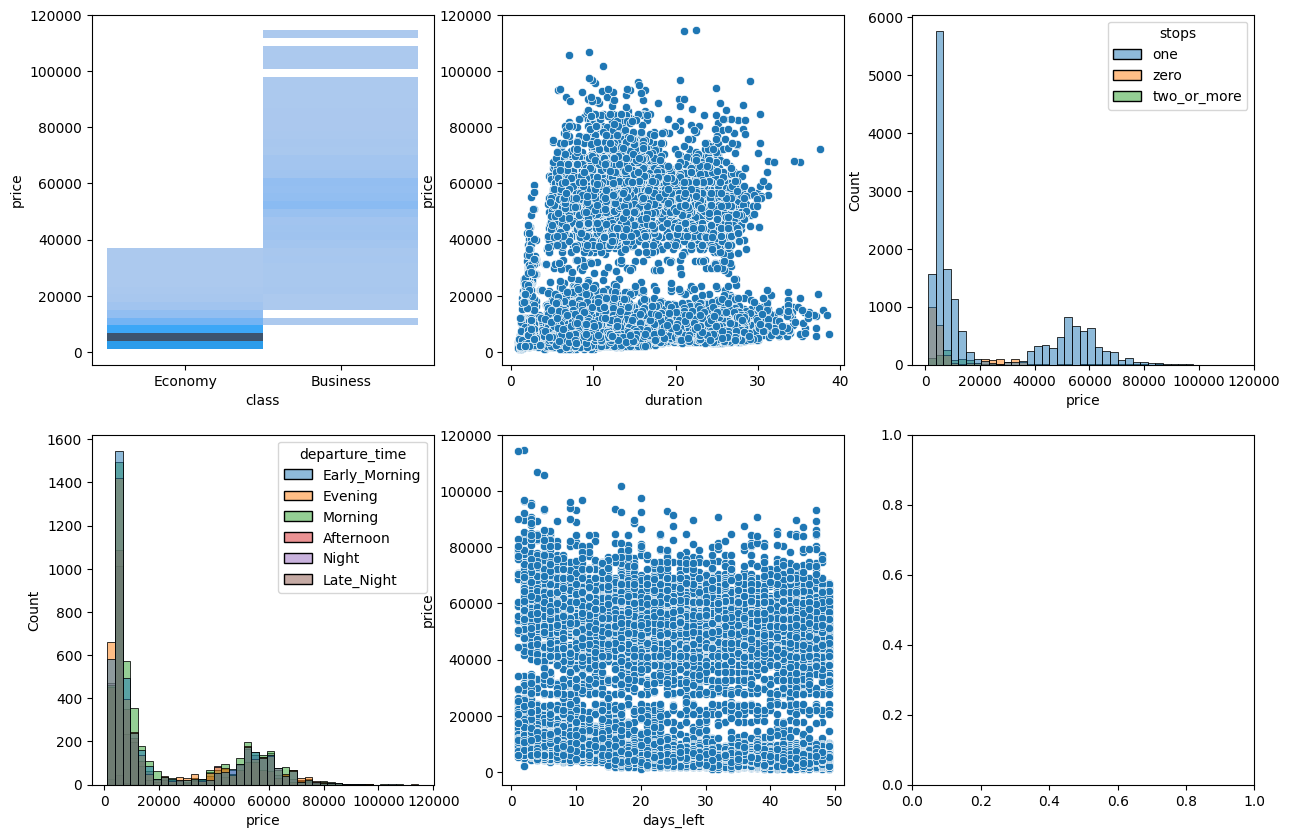

In [ ]:

fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.histplot(ax=ax[0,0],data=train,y='price',x='class')
sns.scatterplot(ax=ax[0,1],data=train,y='price',x='duration')
sns.histplot(ax=ax[1,0],data=train,x='price',hue='departure_time')
sns.scatterplot(ax=ax[1,1],data=train,y='price',x='days_left')
sns.histplot(ax=ax[0,2],data=train,x='price',hue='stops')
plt.show()

In [ ]:

x_train = train.drop('price', axis=1)
y_train = train['price'].copy()

In [ ]:
x_train_cat = train.drop(['duration', 'days_left', 'price', 'flight'], axis=1)
x_train_num = train[['duration', 'days_left']]
x_train_cat.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
id,,,,,,,
1,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy
2,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy
3,Vistara,Bangalore,Morning,one,Evening,Delhi,Business
4,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy
5,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(x_train_num)
cat_attribs = list(x_train_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

x_prepared = full_pipeline.fit_transform(x_train)

x_prepared

<20000x37 sparse matrix of type '<class 'numpy.float64'>'
	with 180000 stored elements in Compressed Sparse Row format>

In [ ]:
# ML

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(x_prepared, y_train)

LinearRegression()

In [ ]:
LR_model.fit(x_prepared, y_train)

LinearRegression()

In [ ]:
test_data = x_train.sample(5)
test_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
11050,GO_FIRST,G8-7537,Mumbai,Afternoon,one,Night,Hyderabad,Economy,7.33,22
8116,Air_India,AI-808,Bangalore,Night,one,Afternoon,Chennai,Business,15.67,20
10756,Vistara,UK-830,Hyderabad,Morning,one,Night,Mumbai,Economy,12.50,13
4131,Vistara,UK-824,Chennai,Night,one,Evening,Delhi,Economy,21.58,4
18134,Air_India,AI-625,Mumbai,Morning,one,Night,Delhi,Business,13.42,6


In [ ]:
predict=LR_model.predict(x_prepared)
predict

array([11621.40478418,  2904.46813972, 56748.52232721, ...,
       15387.72933619, 10739.99667269, 11501.82748512])

In [ ]:

pd.DataFrame({'Guesses':predict, 'Real prices': y_train})

,Guesses,Real prices
id,,
1,11621.404784,7212
2,2904.468140,5292
3,56748.522327,60553
4,9851.521162,5760
5,2579.530459,10712
...,...,...
19996,3717.830194,3153
19997,5612.199538,3911
19998,15387.729336,14822


In [ ]:
# Finding MSE 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predict,y_train)
error=np.sqrt(mse)
print(f"MSE: {error.round()}")

MSE: 6710.0


In [ ]:
def display_scores(scores):
  print("Scores:", scores.round())
  print("Mean:", scores.mean().round())
  print("Std.dev:", scores.std().round())

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, x_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

display_scores(LR_rmse_scores)

Scores: [6754. 6729. 6676. 6362. 6728. 6736. 6923. 6540. 6717. 6994.]
Mean: 6716.0
Std.dev: 168.0


In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(x_prepared, y_train)

RandomForestRegressor()

In [ ]:
predict=RF_model.predict(x_prepared)
predict

array([ 6808.87 ,  5711.36 , 59952.89 , ..., 15155.075,  6476.   ,
        7104.72 ])

In [ ]:
pd.DataFrame({'Guesses':predict, 'Real prices': y_train})

,Guesses,Real prices
id,,
1,6808.870,7212
2,5711.360,5292
3,59952.890,60553
4,5866.670,5760
5,9326.710,10712
...,...,...
19996,3135.650,3153
19997,3706.140,3911
19998,15155.075,14822


In [ ]:

mse=mean_squared_error(predict,y_train)
error=np.sqrt(mse)
print(f"MSE: {error.round()}")

MSE: 1394.0


In [ ]:
# Recheaking the Scores

scores = cross_val_score(RF_model, x_prepared, y_train, scoring="neg_mean_squared_error", cv=5)
RF_rmse_scores = np.sqrt(-scores)

display_scores(RF_rmse_scores)

Scores: [3809. 3894. 3745. 3983. 3870.]
Mean: 3860.0
Std.dev: 80.0
